In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
# Loading the training dataset of house price.
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [8]:
# Loading the testing dataset of house price.
df_testing = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df_testing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
f = open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt", "r")
# print(f.read())

In [12]:
# for i in range(len(df.columns)-1):
#     print(df.iloc[:, i].describe())


In [13]:
# removing the id 
df = df.drop('Id', axis = 1)


In [14]:
# first lets check for datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [15]:
def separate_columns_by_dtype(df):
    int_columns = df.select_dtypes(include=['int64']).columns.tolist()
    float_columns = df.select_dtypes(include=['float64']).columns.tolist()
    object_columns = df.select_dtypes(include=['object']).columns.tolist()

    return int_columns, float_columns, object_columns

In [16]:
int_columns, float_columns, object_columns = separate_columns_by_dtype(df)

In [27]:
def check_null(df, title):
    # Map NULL (NaN) values to 0 and non-null values to 1
    result_filled = df.apply(lambda col: col.map(lambda x: 0 if pd.isna(x) else 1))
    
    # Count the number of NULL (0) and non-null (1) in each feature
    counts = pd.DataFrame({
        'NULL': (result_filled == 0).sum(),
        'NON-NULL': (result_filled == 1).sum()
    })

    # Set a color palette
    sns.set_palette(['#ff9999', '#66b3ff'])  # Red for NULL and Blue for NON-NULL
    
    # Create the bar plot
    ax = counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette())

    # Set plot title and labels
    plt.title(f'Count of NULL and NON-NULL Entries in the Dataset of {title}',)
    plt.xlabel('Features')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.yticks(fontsize=10,)

    # Adding counters at the top of each bar
    for i in ax.containers:
        ax.bar_label(i, label_type='center', fontsize=9, color='black')

    # Set plot layout to avoid overlap
    plt.tight_layout()

    # Customize legend
    legend = plt.legend(loc='upper right')
    legend.get_texts()[0].set_text('NULL')
    legend.get_texts()[1].set_text('NON-NULL')

    # Show the plot
    plt.show()

In [28]:
# now lets explore the each features and try to remove null values 

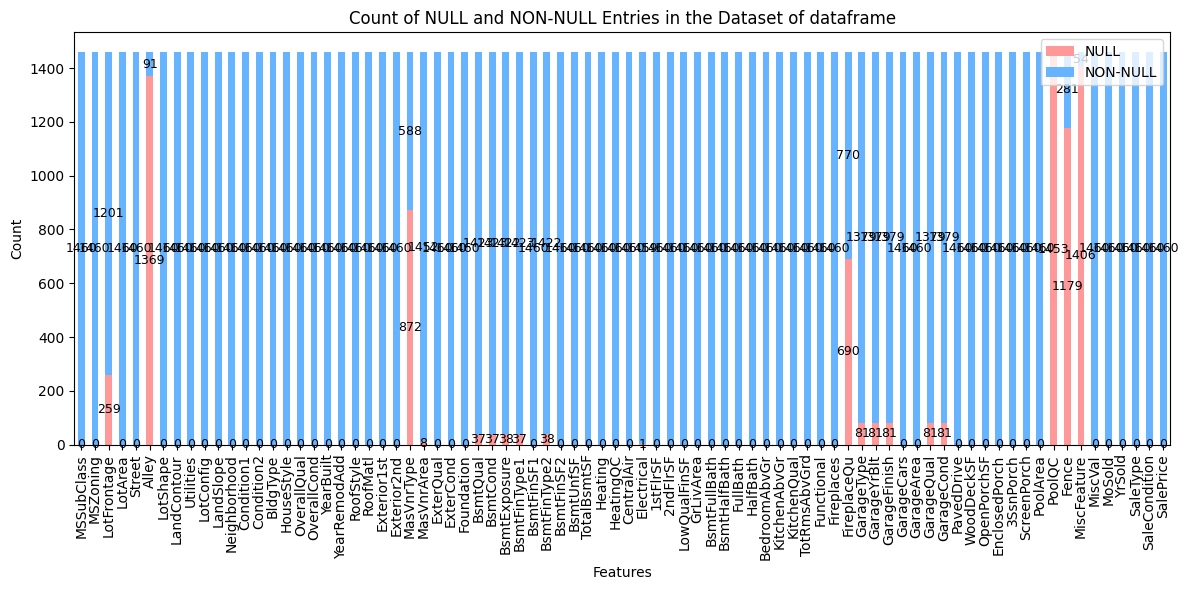

In [29]:
check_null(df, 'dataframe')

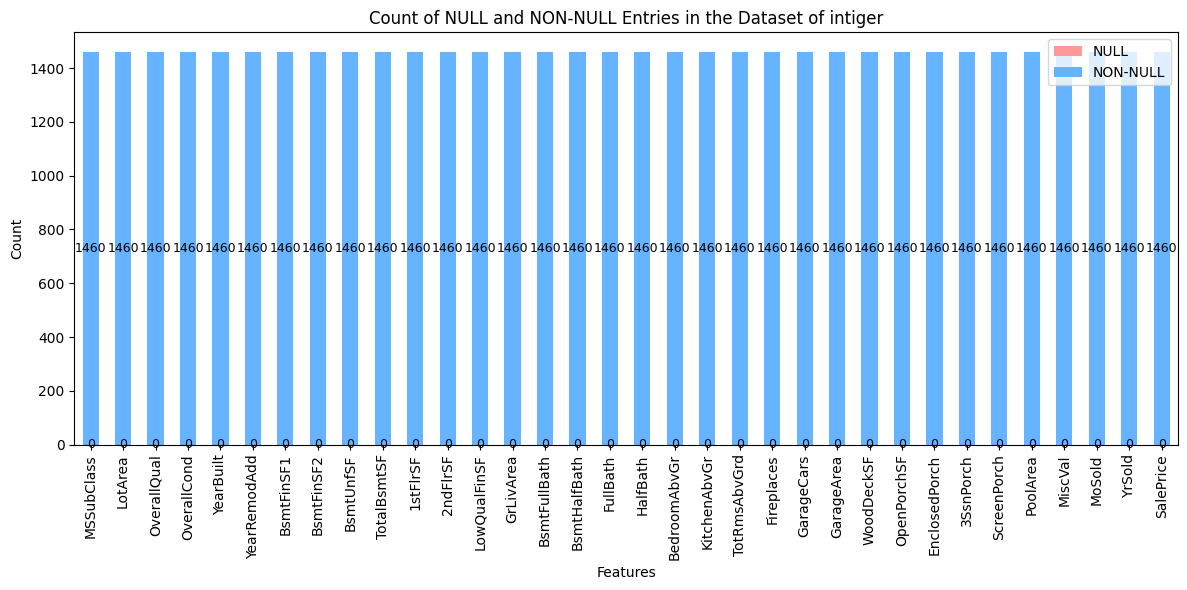

In [30]:
check_null(df[int_columns], 'intiger')

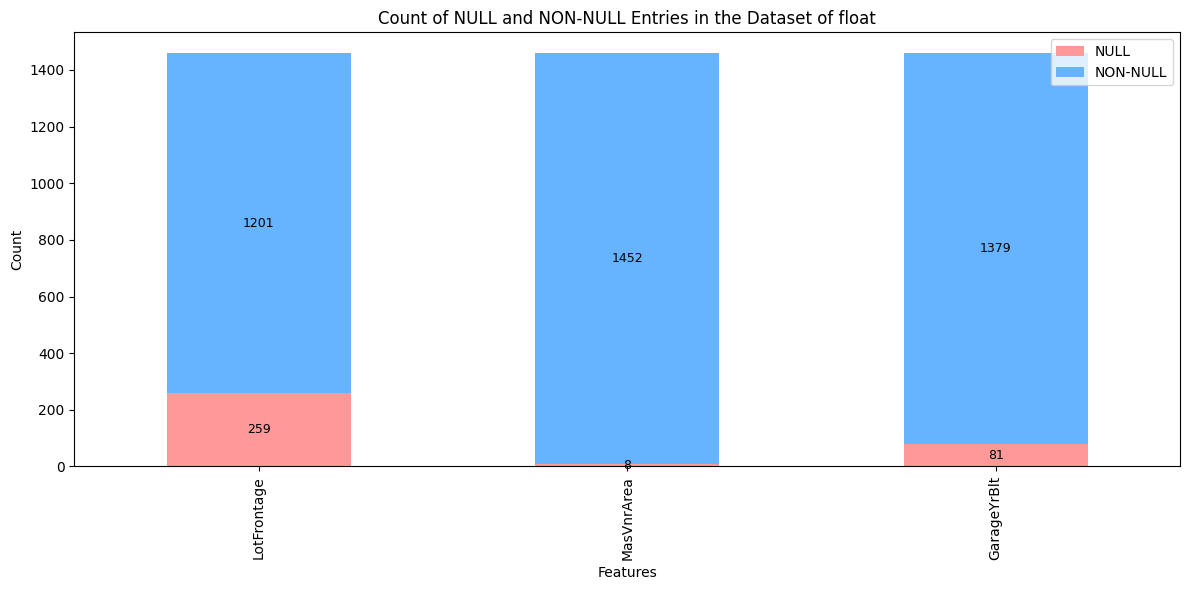

In [31]:
check_null(df[float_columns], 'float')

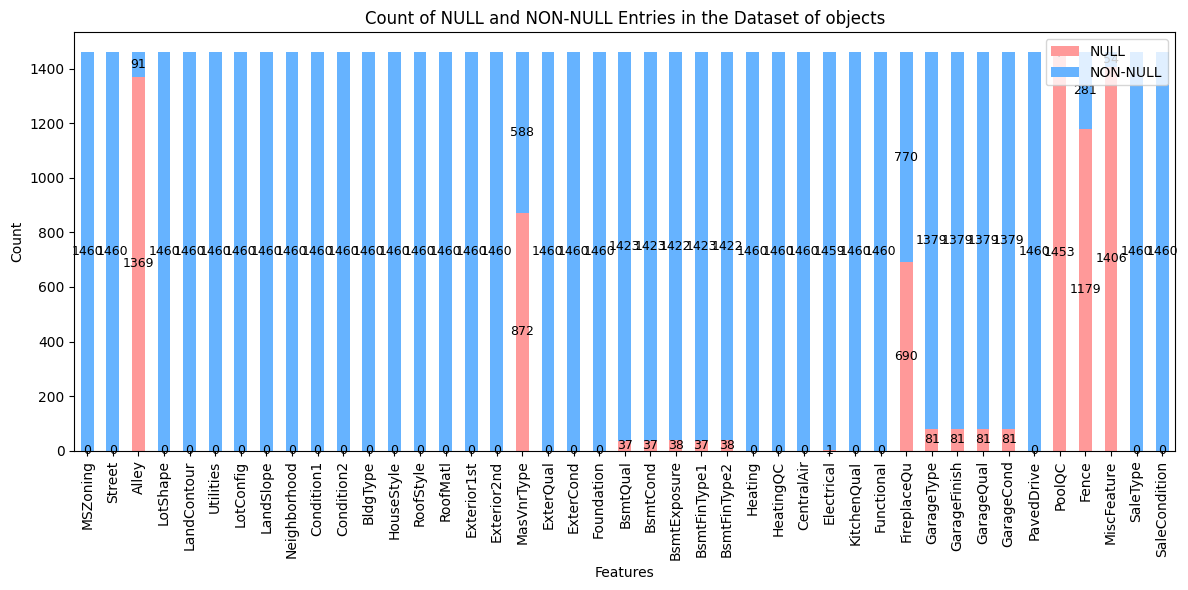

In [32]:
check_null(df[object_columns], 'objects')

In [33]:
### lets remove null and explore the numerical features 
df[int_columns].isnull().sum()
# there is no any nullentries in the datatype integer

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [34]:
def distribution_plot(df, feature):
    # Set plot style
    # sns.set(style="whitegrid")
    
    # Create the plot
    plt.figure(figsize=(5, 3), dpi=200)
    sns.histplot(df[feature], kde=True, color='teal', edgecolor='black', linewidth=1.5)
    
    # Add titles and labels
    plt.title(f'Distribution of {feature}', fontsize=10,  color='darkblue')
    plt.xlabel(f'Range {feature}', fontsize=10, color='darkgreen')
    plt.ylabel('Frequency', fontsize=10, color='darkgreen')
    
    # Customize grid appearance
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)
    
    # Add a background color
    plt.gca().set_facecolor('whitesmoke')
    
    # Customize axis ticks
    plt.xticks(fontsize=10, color='darkred')
    plt.yticks(fontsize=10, color='darkred')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [62]:
def fea_info(df, feature):
    # Comment: Print the count of null values in the feature
    print(f"Count of NULL values in '{feature}': {df[feature].isnull().sum()}")
    
    # Comment: Print information about the data type and non-null counts of the feature
    print(f"\nInfo for '{feature}':")
    print(df[feature].info())
    
    # Comment: Print the descriptive statistics for the feature
    print(f"\nDescriptive Statistics for '{feature}':")
    print(df[feature].describe())

In [63]:
# LotFrontage: Linear feet of street connected to property
fea_info(df, 'LotFrontage')

Count of NULL values in 'LotFrontage': 0

Info for 'LotFrontage':
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1460 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB
None

Descriptive Statistics for 'LotFrontage':
count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


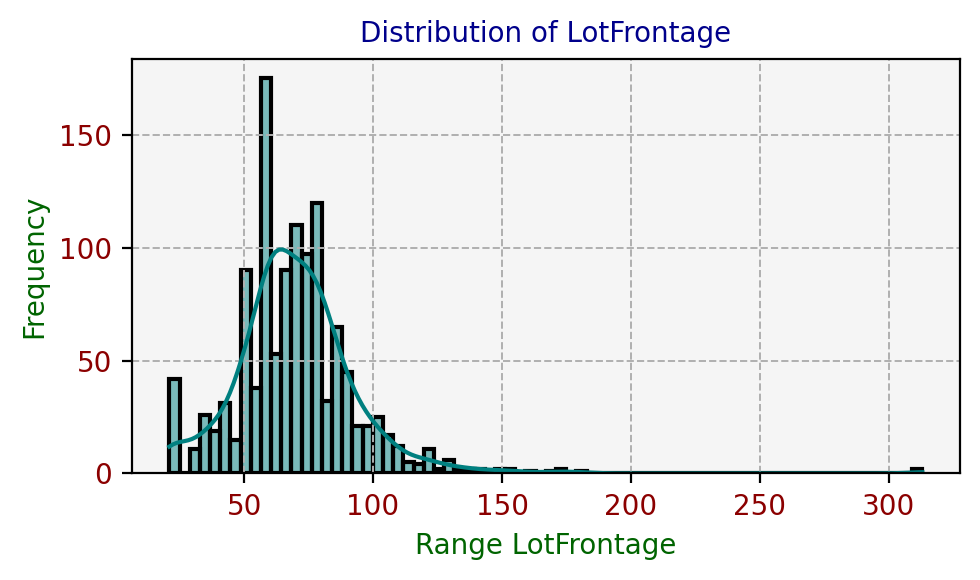

In [39]:
distribution_plot(df, 'LotFrontage')

In [64]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


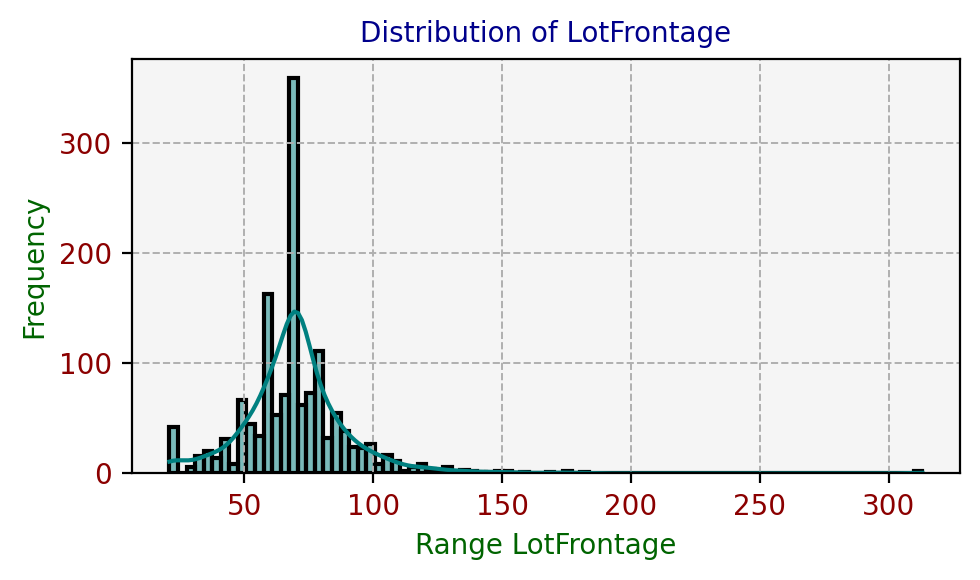

In [65]:
distribution_plot(df, 'LotFrontage')

In [68]:
fea_info(df, 'MasVnrArea')

Count of NULL values in 'MasVnrArea': 8

Info for 'MasVnrArea':
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1452 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB
None

Descriptive Statistics for 'MasVnrArea':
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


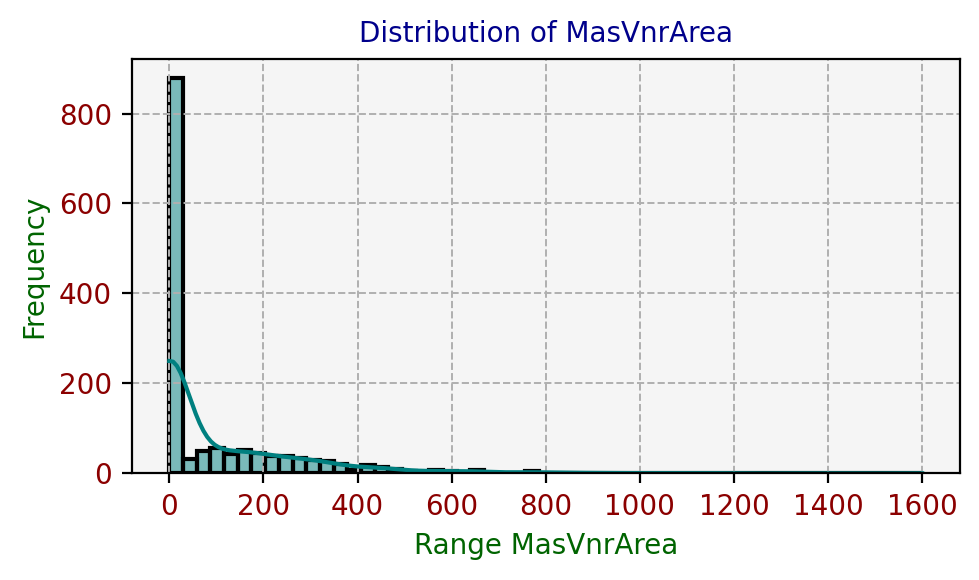

In [69]:
distribution_plot(df, 'MasVnrArea')



In [61]:
fea_info(df, 'MasVnrArea')

Count of NULL values in 'MasVnrArea': 8

Info for 'MasVnrArea':
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1452 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB
None

Descriptive Statistics for 'MasVnrArea':
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [78]:
df['MasVnrArea'] = df['MasVnrArea'].fillna()

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64